## Performing Linear Regression Analysis

In this stage will perform a simple linear regression analysis to predict a movie's revenue based on the budget assigned to the movie production.

For this, we will use the *statsmodel* approach with and without intercept

In [1]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

import warnings

### Loading our dataset

In [2]:
movies = pd.read_csv(r'C:\Users\alana\Documents\TecMTY\8vo_semestre\Data_Science\movie_project\datasets\movie_DB3_clean.csv', index_col='Title')
movies.head()

,Genre,Year,Duration,Budget,Revenue,Imdb,Personalrating,Critic_1,Critic_2,Critic_3,Critic_4,Fans
Title,,,,,,,,,,,,
A quiet place,Horror,2018,90.0,17.0,340.939361,75.0,70.0,70.0,90.0,80.0,8.0,77.5
A quiet place Part II,Horror,2020,97.0,55.0,297.400000,72.0,70.0,80.0,40.0,60.0,6.0,69.0
Aladin (2019),Fantasy,2019,128.0,183.0,1050.693953,69.0,90.0,50.0,70.0,40.0,4.0,81.5
Alice in Wonderland,Fantasy,2010,108.0,205.0,1028.467110,64.0,80.0,40.0,60.0,50.0,7.0,78.0
American Psycho,Horror,2000,101.0,7.0,34.300000,76.0,80.0,60.0,50.0,80.0,7.0,83.5


In [3]:
# Selecting just budget and revenue columns
movies_budget = movies[['Budget', 'Revenue']]
movies_budget.head()

,Budget,Revenue
Title,,
A quiet place,17.0,340.939361
A quiet place Part II,55.0,297.400000
Aladin (2019),183.0,1050.693953
Alice in Wonderland,205.0,1028.467110
American Psycho,7.0,34.300000


In [4]:
# Getting an overall description of our budget and revenue data
movies_budget.describe()

,Budget,Revenue
count,167.000000,167.000000
mean,91.943078,469.075315
std,69.063796,359.675748
min,0.636000,0.621392
25%,25.000000,188.160956
50%,85.000000,383.200000
75%,150.000000,701.750000
max,291.000000,1516.045911


### Graphical analysis

As a first step, we plot the data in order to see if there is a relation between variables and calculate correlation matrix

Text(0.5, 1.0, 'Box office revenue vs Budget')

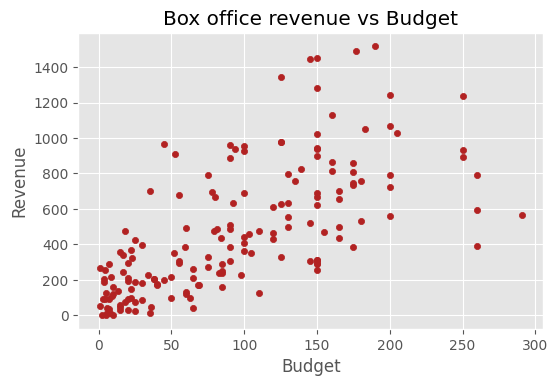

In [5]:
# Scatter plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

movies_budget.plot(
    x    = 'Budget',
    y    = 'Revenue',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Box office revenue vs Budget')

In [6]:
# Linear correlation
# ==============================================================================
corr_test = pearsonr(x = movies_budget['Budget'], y =  movies_budget['Revenue'])
print("Pearson correlation coefficient: ", corr_test[0])
print("P-value: ", corr_test[1])

Pearson correlation coefficient:  0.6811903867597054
P-value:  4.083688095411766e-24


As we can see above, the correlation test and the graph shows a veru slight linear relation. With a low intensity of *r=0.68* and a *p-value* of 4.08e-24.

Although the correlation coefficient is low, we will proceed to generate a linear regression model so we can predict __Revenue__ as a function of __Budget__

# Model fitting

We will fit a linear regression model with __Revenue__ as the response variable, and __Budget__ as the predictor. We will use the **Statsmodels** which provides two ways of training the model:

- Giving a formula for the model and feeding it with a `DataFrame` for the training test that includes the response variable and the predictors. This is similar to the method used in **R**.

- Giving two matrices, a predictor matrix and a response matrix.

In [7]:
# Train-test splitting
# ==============================================================================
X = movies_budget[['Budget']]
y = movies_budget['Revenue']

# Split dataset in training and test
X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 512,
                                        shuffle      = True
                                    )

### Model fitting using a formula

1) With intercept

In [8]:
# Model fitting using a formula
# ==============================================================================
movies_budget_train = pd.DataFrame(np.hstack((X_train, y_train)), columns=['Budget', 'Revenue'])
modelf = smf.ols(formula = 'Revenue ~ Budget', data = movies_budget_train)
modelf = modelf.fit()
modelf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     114.2
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           1.48e-19
Time:                        17:23:30   Log-Likelihood:                -928.34
No. Observations:                 133   AIC:                             1861.
Df Residuals:                     131   BIC:                             1866.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    164.6702     37.418      4.401      0.000      90.649     238.691
Budget         3.4558      0.323     10.687      0.000       2.816       4.095
==============================================================================
Omnibus:                       14.139   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.657
Skew:                           0.719   Prob(JB):                     0.000398
Kurtosis:                       3.869   Cond. No.                         191.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we can see in the OLS Regression results, __R^2__ is very small so we suspect that the intercept must be zero

2) Without intercept

In [9]:
# Model fitting using a formula
# ==============================================================================
movies_budget_train = pd.DataFrame(np.hstack((X_train, y_train)), columns=['Budget', 'Revenue'])
modelf_noint = smf.ols(formula = 'Revenue ~ Budget + 0', data = movies_budget_train)
modelf_noint = modelf_noint.fit()
modelf_noint.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Revenue   R-squared (uncentered):                   0.784
Model:                            OLS   Adj. R-squared (uncentered):              0.782
Method:                 Least Squares   F-statistic:                              478.8
Date:                Wed, 19 Jun 2024   Prob (F-statistic):                    9.57e-46
Time:                        17:25:28   Log-Likelihood:                         -937.51
No. Observations:                 133   AIC:                                      1877.
Df Residuals:                     132   BIC:                                      1880.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Budget         4.5863      0.210     21.882      0.000       4.172       5.001
==============================================================================
Omnibus:                        5.366   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                7.620
Skew:                           0.104   Prob(JB):                       0.0221
Kurtosis:                       4.154   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In effect, eliminating the intercept increases __R^2__

### Model fitting using matrices

1) With intercept

In [10]:
# Model fitting using matrices
# ==============================================================================
# Add a column of 1s to the predictor matrix
X_train_int = sm.add_constant(X_train, prepend=True)
modelm = sm.OLS(endog=y_train, exog=X_train_int,)
modelm = modelm.fit()
modelm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     114.2
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           1.48e-19
Time:                        17:31:04   Log-Likelihood:                -928.34
No. Observations:                 133   AIC:                             1861.
Df Residuals:                     131   BIC:                             1866.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        164.6702     37.418      4.401      0.000      90.649     238.691
x1             3.4558      0.323     10.687      0.000       2.816       4.095
==============================================================================
Omnibus:                       14.139   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.657
Skew:                           0.719   Prob(JB):                     0.000398
Kurtosis:                       3.869   Cond. No.                         191.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2) Without intercept

In [11]:
# Model fitting using matrices
# ==============================================================================
modelm_noint = sm.OLS(endog=y_train, exog=X_train,)
modelm_noint = modelm_noint.fit()
modelm_noint.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.784
Model:                            OLS   Adj. R-squared (uncentered):              0.782
Method:                 Least Squares   F-statistic:                              478.8
Date:                Wed, 19 Jun 2024   Prob (F-statistic):                    9.57e-46
Time:                        17:31:26   Log-Likelihood:                         -937.51
No. Observations:                 133   AIC:                                      1877.
Df Residuals:                     132   BIC:                                      1880.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             4.5863      0.210     21.882      0.000       4.172       5.001
==============================================================================
Omnibus:                        5.366   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                7.620
Skew:                           0.104   Prob(JB):                       0.0221
Kurtosis:                       4.154   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the results obtained previously, for our analysis we will use a model without intercept

## Confidence intervals for the coefficients

In [12]:
# Confidence intervals for the coefficients
# ==============================================================================
modelm_noint.conf_int(alpha=0.05)

array([[4.17173022, 5.00093892]])

## Residual analysis

In [13]:
# Residual analysis
# ==============================================================================
y_train = y_train.flatten()
prediction_train = modelm_noint.predict(exog = X_train)
residues_train   = prediction_train - y_train

In [14]:
residues_train.sum()

-8077.8952272789265

In [15]:
residues_train.mean()

-60.736054340443054

In [16]:
residues_train.min(),residues_train.max()

(-780.6199083104088, 799.4948772709911)

We can see that the sum of residues is not zero

## Graphs

C:\Users\alana\AppData\Local\Temp\ipykernel_41740\646976377.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes[0, 0].plot([y_train.min(), y_train.max()], [prediction_train.min(), prediction_train.max()],
C:\Users\alana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\gofplots.py:1043: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0.5, 0.98, 'Residual analysis')

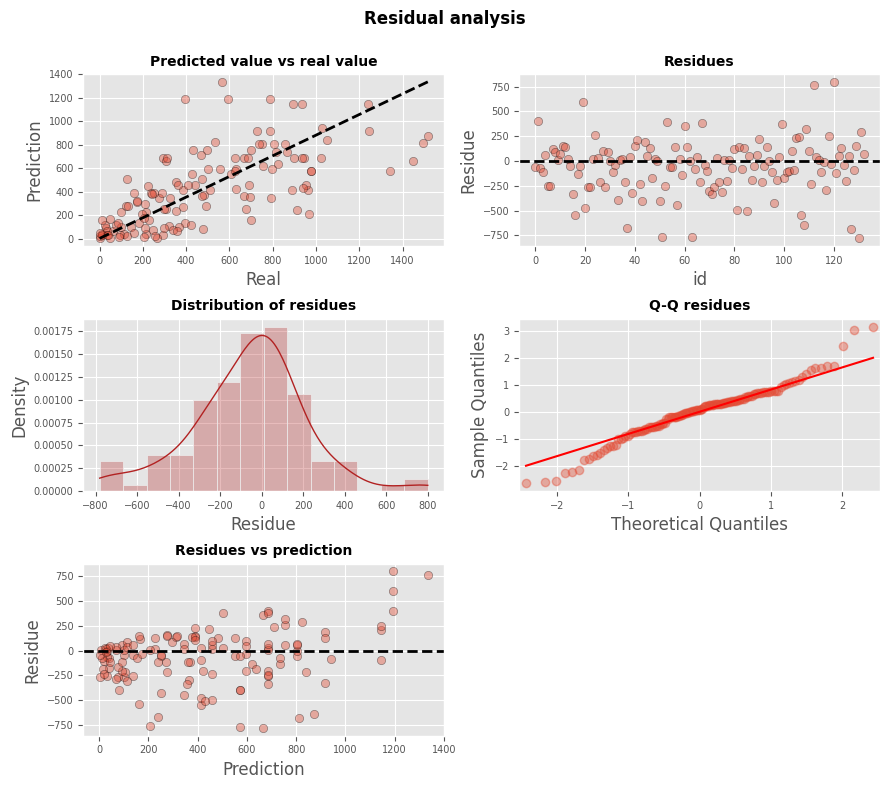

In [17]:
# Graphs
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediction_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [prediction_train.min(), prediction_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Predicted value vs real value', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Prediction')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residues_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residues', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residue')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residues_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribution of residues', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residue")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residues_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residues', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediction_train, residues_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residues vs prediction', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Prediction')
axes[2, 0].set_ylabel('Residue')
axes[2, 0].tick_params(labelsize = 7)

# Eliminate empty axes
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Residual analysis', fontsize = 12, fontweight = "bold")

## Normality tests

Now, we will verify if the residues follow a normal distribution using two stadistical tests:

- Shapiro-Wilk

- D'Agostino K-squared test

On both tests, the null hypothesis considers that the data follows a normal distribution. Hence, if the *$p$-value* is not smaller than the selected significance level *alpha* there is no evidence to reject the statement that the data is normally distributed.

In [18]:
# Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(residues_train)
shapiro_test

ShapiroResult(statistic=0.9694458885209951, pvalue=0.004320141660317331)

In [19]:
# D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(residues_train)
print(f"Statistic= {k2}, p-value = {p_value}")

Statistic= 5.366478569159005, p-value = 0.06834141791358568


## Predictions

Now that we trained our model, we can make predictions for new data. 

In [20]:
# Predictions with 95% confidence intervals
# ==============================================================================
#predictions = modelm_noint.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predictions = modelm_noint.fittedvalues
predictions

array([ 550.36014843, 1192.44698827,   41.27701113,  270.59373965,
         91.72669141,  137.59003711,  687.95018554,  550.36014843,
        114.65836426,    9.17266914,  343.97509277,  275.18007422,
        275.18007422,  458.63345703,  100.89936055,  687.95018554,
        412.77011132,  733.81353124,  252.24840137, 1192.44698827,
        412.77011132,   33.02160891,    3.93507506,  343.97509277,
        756.7452041 ,  504.49680273,  839.29922636,  596.22349414,
        100.89936055,  298.11174707,  100.89936055,  371.49310019,
        137.59003711,   82.55402226,   68.79501855,   36.69067656,
        687.95018554,  240.32393148,   68.79501855,  917.26691405,
        389.83843847, 1146.58364257,  458.63345703,  573.29182128,
        917.26691405,  756.7452041 ,  481.56512988,   38.98384385,
         22.93167285,   32.10434199,  573.29182128,  573.29182128,
        687.95018554,  687.95018554,  802.6085498 ,   32.10434199,
        311.87075078,  343.97509277,  687.95018554,  619.15516